In [ ]:
import pandas as pd
import numpy as np
import os
import missingno as msno

### Relevant Resources:
- https://www.analyticsvidhya.com/blog/2021/05/dealing-with-missing-values-in-python-a-complete-guide/
- https://towardsdatascience.com/8-methods-for-handling-missing-values-with-python-pandas-842544cdf891
- https://www.section.io/engineering-education/complete-guide-to-dealing-with-missing-values-in-python/
- https://machinelearningmastery.com/handle-missing-data-python/
- https://www.kaggle.com/code/parulpandey/a-guide-to-handling-missing-values-in-python
- https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/


### Why missing values are an issue:
- Reduced Statistical Power: When you have missing values, you're essentially working with a reduced dataset. The fewer observations you have, the less statistical power your model has.  It could make you conclude that a certain variable has no effect, when it actually does, if only you had sufficient data to accurately detect it.

- Bias: Missing data can introduce a lot of bias into your dataset, which can make your sample unrepresentative of your population. For example, if certain observations are more likely to be missing than others, your results can become biased.

- Inaccuracy: Most statistical techniques assume complete information. Any missing data can skew the results and make them less accurate or even invalid.

- Inability to Use Certain Models: Some machine learning models can't handle missing values at all. For example, Support Vector Machines (SVM), k-nearest neighbors (KNN), and Neural Networks cannot handle missing values and will return an error if missing values are present in the data they are trying to process.

- Complicated handling: If you just ignore the missing values, some procedures can become complicated to handle. For instance, if you're doing any type of sequence analysis, a missing value could disrupt the sequence.

In [ ]:
# Import the titanic data from Kaggle:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print('training data shape', train.shape)
print('testing data shape', test.shape)

train.head()

training data shape (891, 12)
testing data shape (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Info gives the number of records and the number of records without null values in the df
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Calculating the percentage of null values in a column and filtering out the columns without no nulls:

def missing_val_perc_df(df):
  missing_val_perc = (100*df.isnull().sum()/len(df)).round(2)
  missing_val_df = pd.DataFrame(missing_val_perc, columns = ['missing_perc'])
  missing_col_df = missing_val_df[missing_val_df['missing_perc'] > 0]
  return missing_col_df.sort_values(by = 'missing_perc', ascending = False)

missing_val_perc_df(train)

,missing_perc
Cabin,77.10
Age,19.87
Embarked,0.22


### Reasons for Missing Values:

- Missing Completely at Random (MCAR): The reason for the missing data is unrelated to the dataset. For example, a survey respondent might accidentally skip a question, or a technical glitch might prevent a measurement from being taken. In an MCAR scenario, the fact that the data is missing is independent of both the observed and unobserved data.

- Missing at Random (MAR): The probability of missing data is related to some observed data but not the missing data. For instance, people of different genders might answer questions about income differently, with one gender being more likely to refuse to answer the question. If you know the gender of all respondents, you can adjust for this tendency.

- Missing Not at Random (MNAR): The probability of missing data is related to the missing data itself, even after accounting for the observed data. For example, in a health survey, people with severe health conditions may be less likely to respond to the survey due to their health, making their responses not completely random.

All definitions taken from Wikipedia: https://en.wikipedia.org/wiki/Missing_data

<Axes: >

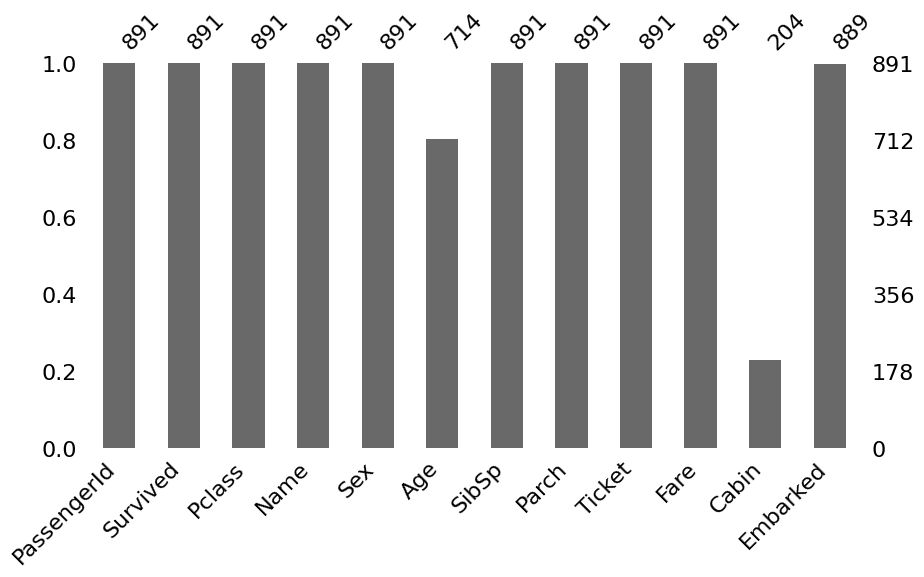

In [ ]:
msno.bar(train,figsize=(10,5))

<Axes: >

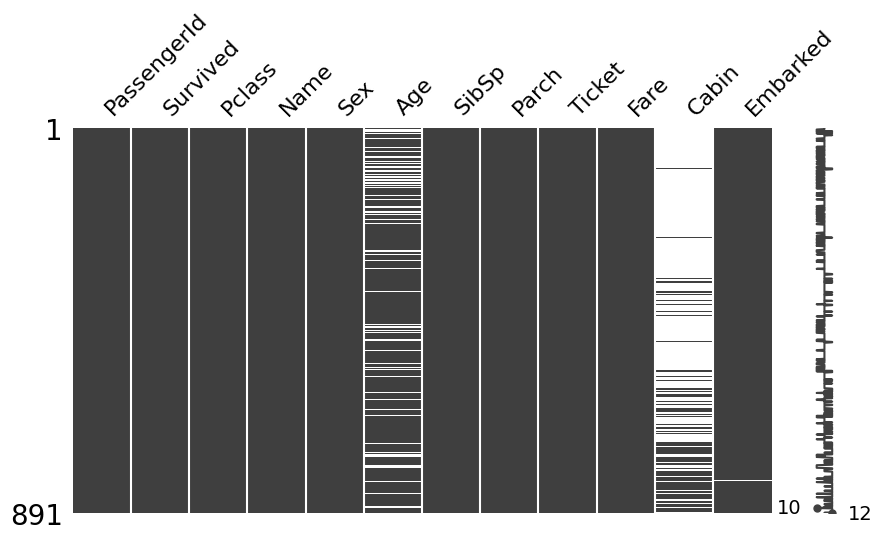

In [ ]:
# Sort the missing values matrix by a column and look at how it is distributed
sorted = train.sort_values(by = 'Fare', ascending = True)
msno.matrix(sorted,figsize=(10,5))

<Axes: >

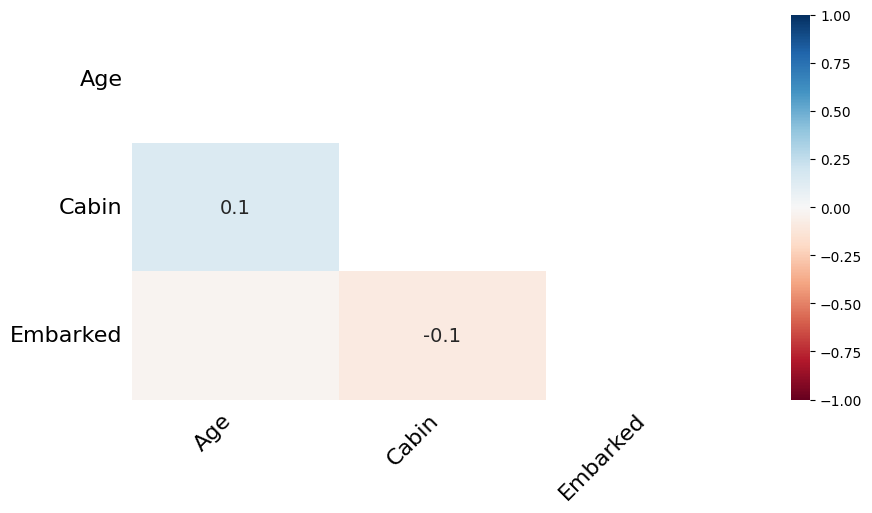

In [ ]:
# Nullity heatmap:

msno.heatmap(train,figsize=(10,5))

The nullity correlation ranges from -1 to 1.

- -1 - Exact Negative correlation represents that if the value of one variable is present then the value of other variables is definitely absent.
- 0 - No correlation represents that variables' values present or absent do not have any effect on one another.
- 1 - Exact Positive correlation represents that if the value of one variable is present then the value of the other is definitely present.

<Axes: >

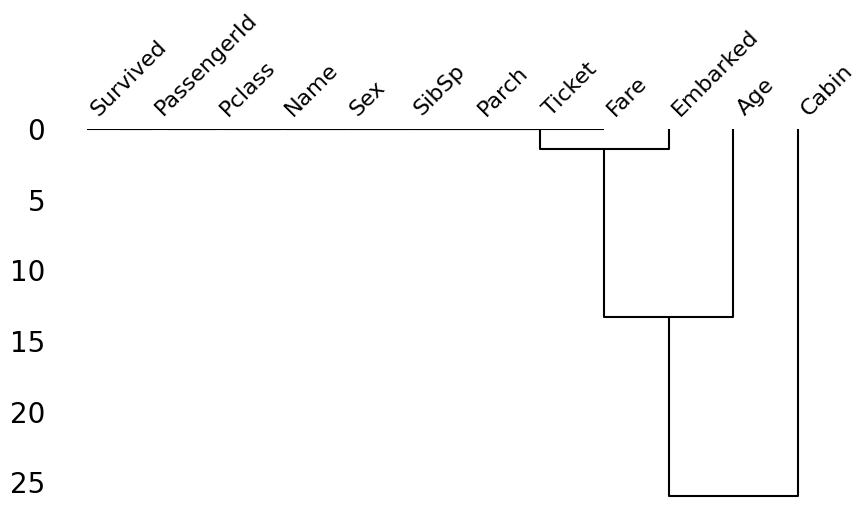

In [ ]:
# Missing values dendrogram:
msno.dendrogram(train,figsize=(10,5))

Below we are plotting dendrogram which shows hierarchical cluster creation based on missing values correlation between various datasets. The columns of the dataset which have a deep connection in missing values between them will be kept in the same cluster.
check: https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python

### Missing Value treatment:
### Deletions:
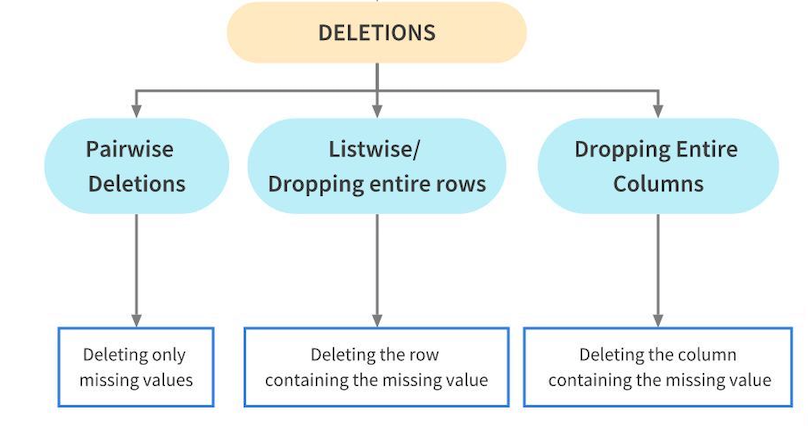

### Pairwise Deletions:
- In pairwise deletion, only the specific missing value is deleted, and the complete (non-missing) values of the variables are used for statistical analysis.
- For instance, consider you're calculating the correlation matrix for a dataset. If you're using pairwise deletion and a certain observation is missing a value for variable A but has a value for variable B, you would exclude that observation when calculating the correlation involving variable A, but include it when calculating the correlation involving variable B
- Parwise Deletion is used when values are missing completely at random i.e MCAR. During Pairwise deletion, only the missing values are deleted. All operations in pandas like mean,sum etc intrinsically skip missing values.

In [ ]:
train['Age'].mean()

29.69911764705882

### Listwise Deletion / Dropping rows:
- During Listwise deletion, complete rows(which contain the missing values) are deleted. As a result, it is also called Complete Case deletion. Like Pairwise deletion, listwise deletions are also only used for MCAR values

### Dropping complete columns
- If a column contains a lot of missing values, say more than 80%, and the feature is not significant, you might want to delete that feature. However, again, it is not a good methodology to delete data.

In [ ]:
# Deleting all rows with null values:
train1 = train.copy()
train1.dropna(inplace = True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [ ]:
# Deleting all columns with null values:
train1 = train.copy()
train1.dropna(axis = 1, inplace = True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
dtypes: float64(1), int64(5), object(3)
memory usage: 62.8+ KB


In [ ]:
# Deleting rows which contain ONLY Null values:
train1 = train.copy()
dat = {'PassengerId':None,'Survived':None,'Pclass':None,'Name':None,'Sex':None,'SibSp':None,'Parch':None,'Ticket':None,'Fare':None}
train1 = train1.append(dat, ignore_index = True)
train1.dropna(how = 'all', inplace = True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    object 
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), object(10)
memory usage: 90.5+ KB


<ipython-input-12-9b0b750a7e6b>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train1 = train1.append(dat, ignore_index = True)


In [ ]:
# Deleting columns which contain ONLY Null values:
train1 = train.copy()
train1['Fathers_name'] = None
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Fathers_name  0 non-null      object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [ ]:
train1.dropna(how = 'all',axis = 1, inplace = True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Deleting rows with null value in a specific column
train1= train.copy()
train1.dropna(subset = 'Age', how = 'any', inplace = True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


In [ ]:
# Dropping rows with more than 1 missing values:
train1 = train.copy()
train1.dropna(thresh = 1, inplace = True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Dropping columns with more than 1 missing values:
train1 = train.copy()
train1.dropna(thresh = 1, inplace = True, axis = 1)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Imputations:
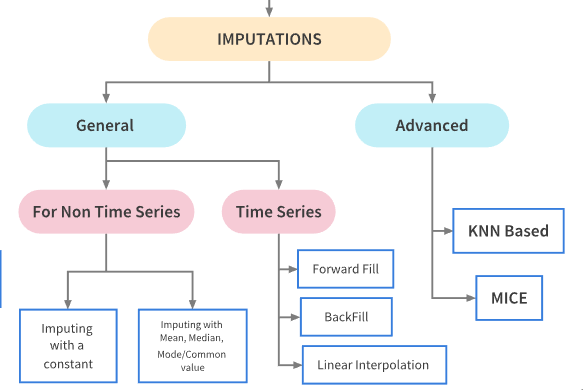

### Basic Imputation Techniques
- Imputation with a constant value
- Imputation using statistics (mean, median or most frequent) of each column in which the missing values are located

In [ ]:
# Imputing with a constant value:
train1 = train.copy()
train1.fillna(value = 0, inplace = True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Imputing with a constant value for each column:
train1 = train.copy()
values = {'Age':18, 'Cabin':'No_Cabin', 'Embarked':'S'}
train1.fillna(value = values, inplace = True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Fill with an aggregate value:
train1 = train.copy()
train1['Age'].fillna(train1['Age'].mean(), inplace = True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Fill with median using replace() method:
train1 = train.copy()
train1['Age'] = train1['Age'].replace(np.nan, train1['Age'].median())
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Fill with modal value:
import statistics
train1 = train.copy()
train1['Age'].fillna(statistics.mode(train1['Age']), inplace = True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Back fill and front fill are typically used in time series data

In [ ]:
# Frontfill the data
train1 = train.copy()
train1['Age'].fillna(method = 'ffill', inplace = True)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Backfill the data. limit allows to backfill from only the next row
train1 = train.copy()
train1['Age'].fillna(method = 'bfill', inplace = True, limit = 1)
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          865 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Linear Interpolation: https://www.lexjansen.com/nesug/nesug01/ps/ps8026.pdf
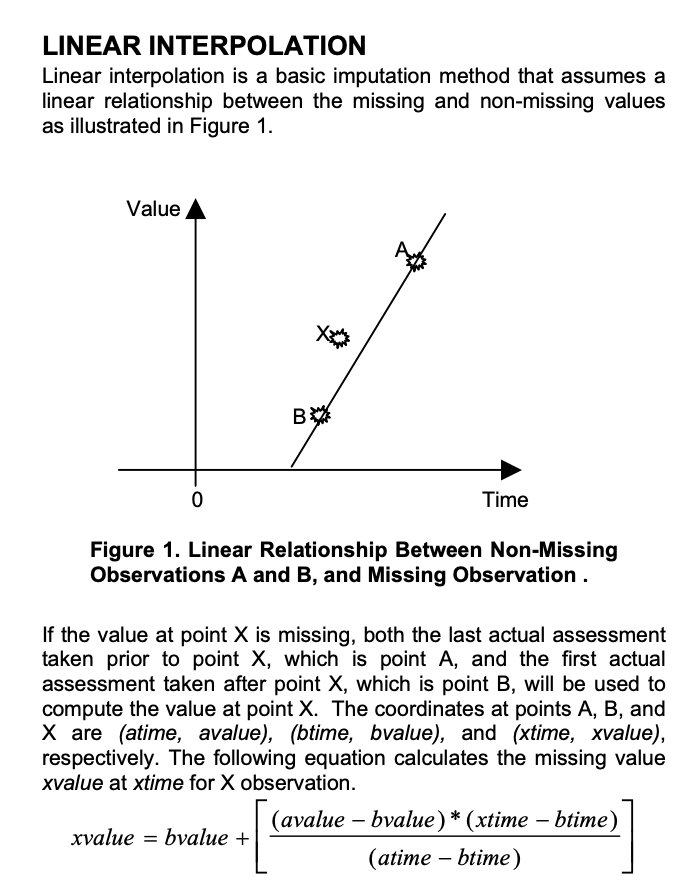


In [ ]:
train1 = train.copy()
train1['Age'].interpolate(method = 'linear', limit_direction = 'both', inplace = True) # direction can be set to forward /backward
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Simple imputation with Scikitlearn
from sklearn.impute import SimpleImputer
train1 = train.copy(deep = True)
mean_imputer = SimpleImputer(strategy='mean') # strategy can be median/ mode
train1['Age'] = mean_imputer.fit_transform(train1[['Age']])
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Advanced Imputation Techniques
- Advanced imputation techniques uses machine learning algorithms to impute the missing values in a dataset unlike the previous techniques where we used other column values to predict the missing values. We shall look at the following two techniques in this notebook:

### K-Nearest neighbors imputation
- The KNNImputer class provides imputation for filling in missing values using the k-Nearest Neighbors approach.Each missing feature is imputed using values from n_neighbors nearest neighbors that have a value for the feature. The feature of the neighbors are averaged uniformly or weighted by distance to each neighbor.

In [ ]:
from sklearn.impute import KNNImputer

train1 = train.copy(deep = True)
knn_imputer = KNNImputer(n_neighbors=2, weights='uniform') # you can also weight by 'distance'
train1['Age'] = knn_imputer.fit_transform(train1[['Age']])
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Multivariate feature imputation - Multivariate imputation by chained equations (MICE)
- A strategy for imputing missing values by modeling each feature with missing values as a function of other features in a round-robin fashion. It performns multiple regressions over random sample ofthe data, then takes the average ofthe multiple regression values and uses that value to impute the missing value. In sklearn, it is implemented as follows:

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
train1 = train.copy(deep=True)

mice_imputer = IterativeImputer()
train1['Age'] = mice_imputer.fit_transform(train1[['Age']])
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Imputing with a Linear Regression Model:

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

traindf = train[train['Age'].isnull() == False] # Building a model with non-null values
testdf = train[train['Age'].isnull() == True] # to predict the null values

# y is the target variable
y = traindf['Age']

# dropping the age columns from train and test data
traindf.drop(['Age','PassengerId','Ticket','Name', 'Cabin','Embarked','Sex'],axis = 1, inplace = True)
testdf.drop(['Age','PassengerId','Ticket','Name', 'Cabin','Embarked','Sex'],axis = 1, inplace = True)

# Build model and make predictions
lr.fit(traindf,y)
pred = lr.predict(testdf)

# Fill null values with predictions
testdf['Age'] = pred

<ipython-input-29-7348679fb019>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop(['Age','PassengerId','Ticket','Name', 'Cabin','Embarked','Sex'],axis = 1, inplace = True)
<ipython-input-29-7348679fb019>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop(['Age','PassengerId','Ticket','Name', 'Cabin','Embarked','Sex'],axis = 1, inplace = True)
<ipython-input-29-7348679fb019>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [ ]:
train1 = pd.concat([train[train['Age'].notnull()],testdf], axis = 0)
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    float64
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        185 non-null    object 
 11  Embarked     712 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 90.5+ KB
